In [665]:
import torch
from torch import nn

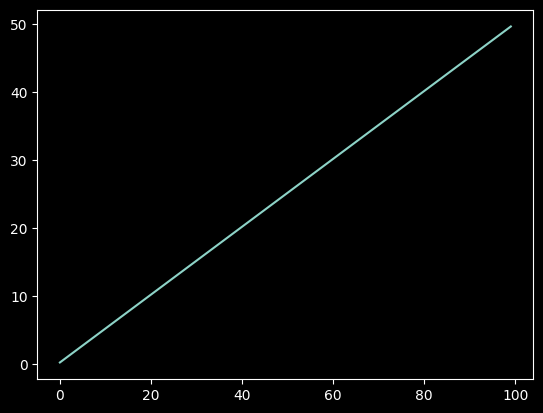

In [666]:
import numpy as np
from matplotlib import pyplot as plt


weight = 0.5
bias = 0.2 

line1 = torch.tensor([ x*weight +bias for x in range(100)])

plt.plot(line1)

In [667]:
torch.tanh(line1)

tensor([0.1974, 0.6044, 0.8337, 0.9354, 0.9757, 0.9910, 0.9967, 0.9988, 0.9996,
        0.9998, 0.9999, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

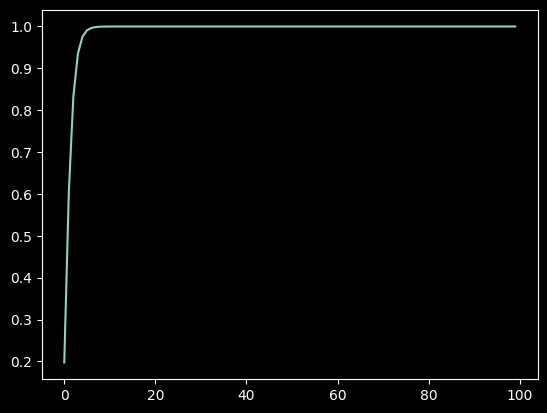

In [668]:
plt.plot(torch.tanh(line1))

In [669]:
def tanh_fun(x: np.ndarray) -> np.ndarray:
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))



In [670]:
tanh_fun(line1.numpy())

array([0.19737534, 0.6043678 , 0.83365464, 0.93540907, 0.97574306,
       0.99100745, 0.9966824 , 0.9987783 , 0.9995502 , 0.9998346 ,
       0.9999391 , 0.9999775 , 0.9999917 , 0.999997  , 0.9999989 ,
       0.9999996 , 0.9999999 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

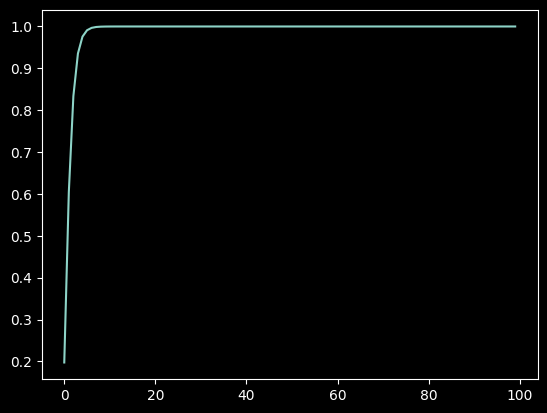

In [671]:
plt.plot(tanh_fun(line1.numpy()))

## Creating spiral datasets

shape of X : (300, 2) || 300 is 100*3  || 2 is the number of features
shape of y  is (300,)


<function matplotlib.pyplot.show(close=None, block=None)>

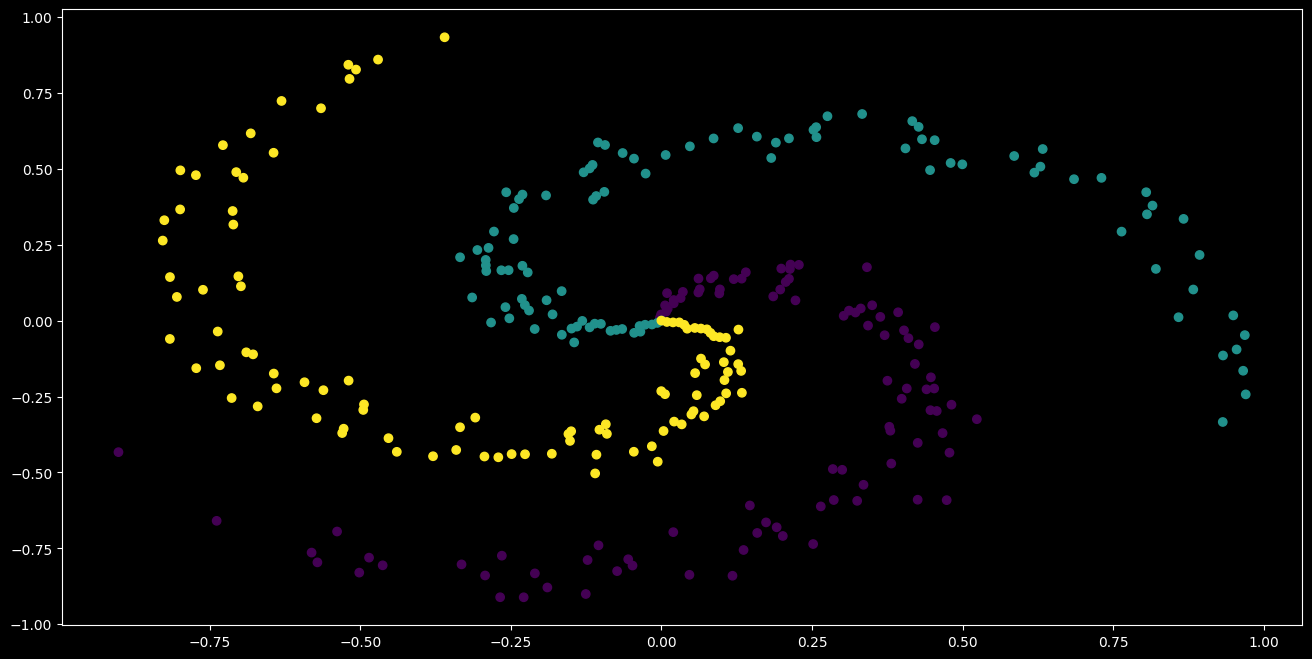

In [672]:
import numpy as np 
import matplotlib.pylab as plt

RANDOM_SEED = 42
np.random.seed = RANDOM_SEED

n_samples = 100
dimentionality = 2
n_class = 3 


x = np.zeros((n_samples*n_class, dimentionality))
print(f"shape of X : {x.shape} || {x.shape[0]} is 100*3  || {x.shape[1]} is the number of features")
y = np.zeros(n_samples*n_class, dtype='uint8')
print(f"shape of y  is {y.shape}")

plt.figure(figsize=(16,8))
for j in range (n_class):
    class_value = range(j*n_samples, (j+1)*n_samples)
    radius = np.linspace(0.0,1,n_samples)
    # print(len(class_range), radius.shape)
    theta = np.linspace(j*4, (j+1)*4, n_samples) + np.random.randn(n_samples)*0.2
    # print(len(theta))
    #plt.subplot(1,3,j+1)
    #plt.scatter(radius, theta)
    x[class_value] = np.c_[radius*np.sin(theta), radius*np.cos(theta)]
    y[class_value] = j
    #plt.scatter(x[:,0], x[:,1], c=y)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show
    

In [673]:
device = "cuda" if torch.cuda.is_available else "cpu"

if type(x) != 'torch.FloatTensor':
    x = torch.from_numpy(x).type(torch.float).to(device)
    y = torch.from_numpy(y).type(torch.LongTensor).to(device)

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y ,train_size=0.8, random_state=RANDOM_SEED
)


In [674]:
def acc_fun(y_preds, y_true):
    return torch.eq(y_preds,y_true).sum().item()/(len(y_true))*100

In [675]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
class spiral_classifier(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
        self.block1 = nn.Sequential(
            nn.Linear(2, 500),
            nn.ReLU(),
            nn.Linear(500,1000),
            nn.ReLU(),
            nn.Linear(1000,1000),
            nn.ReLU(),
            nn.Linear(1000, 3),
            nn.LeakyReLU(),
        )
    def forward(self,x):
        return self.block1(x)

In [676]:
model = spiral_classifier().to(device)

In [677]:
logits = model(x[:10])
torch.softmax(logits, dim=1).argmax(dim=1), y[:10]

(tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0'),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0'))

In [678]:
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(
    params=model.parameters(),
    lr = 0.01
)

In [679]:
epochs = 4501
from functions import plot_decision_boundary
for epoch in range(epochs):
    model.train()
    
    logits = model(xtrain)
    preds = torch.softmax(logits, dim=1).argmax(dim=1)

    #* CrossEntory loss input is logits + true value 
    loss = loss_fn(logits, ytrain)
    acc = acc_fun(y_preds= preds, y_true= ytrain)
    #print(loss)
    opt.zero_grad()
    loss.backward()
    opt.step()
    
    model.eval()
    
    with torch.inference_mode():
        logits = model(xtest)
        preds = torch.softmax(logits, dim=1).argmax(dim=1)
        
        loss_test = loss_fn(logits, ytest)
        acc_test = acc_fun(y_preds= preds, y_true= ytest)
        
    if epoch %100 == 0:
        print(f"Epoch: {epoch+1}/{epochs} | Loss: {loss.item():.4f} | Acc: {acc:.2f}% | Test Loss: {loss_test.item():.4f} | Test Acc: {acc_test:.2f}%")

       

#preds.type(), ytrain.type()

Epoch: 1/4501 | Loss: 1.0973 | Acc: 32.50% | Test Loss: 1.0969 | Test Acc: 36.67%
Epoch: 101/4501 | Loss: 1.0710 | Acc: 40.42% | Test Loss: 1.0699 | Test Acc: 43.33%
Epoch: 201/4501 | Loss: 1.0528 | Acc: 43.33% | Test Loss: 1.0501 | Test Acc: 45.00%
Epoch: 301/4501 | Loss: 1.0388 | Acc: 46.25% | Test Loss: 1.0347 | Test Acc: 46.67%
Epoch: 401/4501 | Loss: 1.0280 | Acc: 47.92% | Test Loss: 1.0231 | Test Acc: 50.00%
Epoch: 501/4501 | Loss: 1.0186 | Acc: 52.92% | Test Loss: 1.0135 | Test Acc: 56.67%
Epoch: 601/4501 | Loss: 0.9752 | Acc: 48.33% | Test Loss: 0.9800 | Test Acc: 50.00%
Epoch: 701/4501 | Loss: 0.9171 | Acc: 48.33% | Test Loss: 0.9323 | Test Acc: 51.67%
Epoch: 801/4501 | Loss: 0.8740 | Acc: 52.92% | Test Loss: 0.8909 | Test Acc: 55.00%
Epoch: 901/4501 | Loss: 0.8409 | Acc: 56.67% | Test Loss: 0.8587 | Test Acc: 60.00%
Epoch: 1001/4501 | Loss: 0.7202 | Acc: 67.50% | Test Loss: 0.7163 | Test Acc: 68.33%
Epoch: 1101/4501 | Loss: 0.6500 | Acc: 66.25% | Test Loss: 0.6368 | Test Acc:

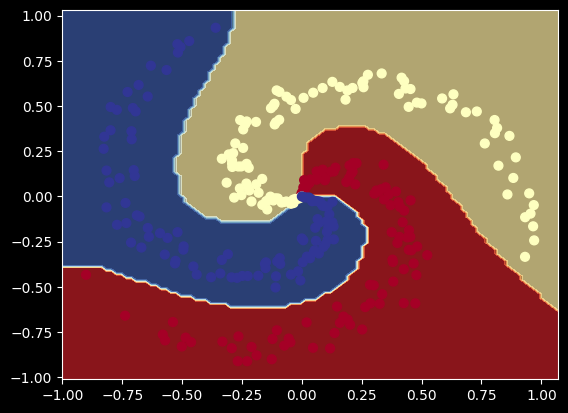

In [680]:


plot_decision_boundary(model, x, y)